### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### Independent variable : Condition (Congruent and Incongruent)
#### Dependent variable: Time

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

--write answer here--
#### Null Hypothesis = No difference in time between congruent and incongruent condition
#### Alternative Hypothesis = Congruent and incongruent conditions have time difference
$$
H_0:\mu_D = \mu_2 - \mu_1 = 0
$$$$
H_a:\mu_D = \mu_2 - \mu_1 \neq 0
$$
where  

$\mu_D$: Difference between mean of the time taken  

$\mu_1$: mean time taken in Congruent condition  

$\mu_2$ : mean time taken in incongruent condition    


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [101]:
# Perform the analysis here
# Importing Standard Packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics

In [102]:
# loading the data
df = pd.read_csv('stroopdata.csv')

In [103]:
# Visualizing the first 5 rows
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [104]:
# Displaying the descriptive statistics of the data
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [105]:
#finding the median of the congruent samples
np.median(df['Congruent'])

14.3565

In [106]:
#finding the median of the incongruent samples
np.median(df['Incongruent'])

21.0175

In [107]:
#finding the mode of the congruent samples
scipy.stats.mode(df['Congruent'])

ModeResult(mode=array([8.63]), count=array([1]))

In [108]:
#finding the mode of the Incongruent samples
scipy.stats.mode(df['Incongruent'])

ModeResult(mode=array([15.687]), count=array([1]))

In [109]:
#finding the variance of the Congruent samples
statistics.variance(df['Congruent'])

12.669029070652176

In [110]:
#finding the variance of the Incongruent samples
statistics.variance(df['Incongruent'])

23.011757036231888

## Descriptive Statistics
Total number of samples is 24  

### Measure of central Tendency
Mean of the Congruent samples = 14.05  
Mean of the Incongruent samples = 22.015  
Median of the Congruent samples = 14.3565  
Median of the Incongruent samples = 21.0175  
Mode of the Congruent samples = 8.63  
Mode of the Incongruent samples = 15.687  

### measure of Variablity
Standard Deviation of Congruent samples = 3.56  
Standard Deviation of Incongruent samples = 4.80  
Variance of Congruent samples = 12.669  
Variance of Incongruent samples = 23.012

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [111]:
# Build the visualizations here

In [112]:
# Converting the dataframe to an array
x=df['Congruent']
y=df['Incongruent']

In [123]:
# Importing required standard packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Enable inline viewing of graphs
%matplotlib inline

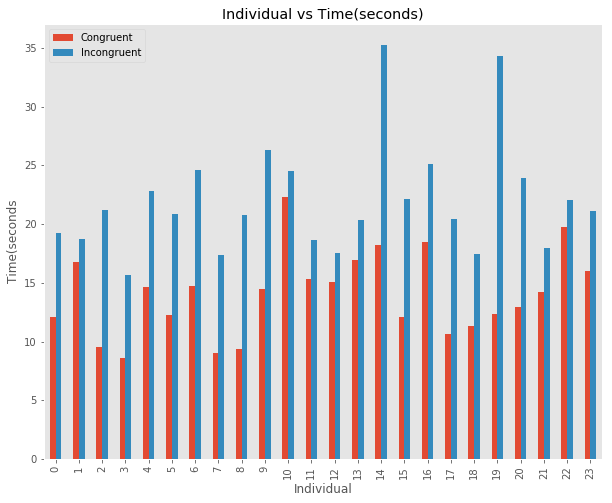

In [124]:
# Plotting the visualization for each individual showing Congruent and Incongruent side by side
df.plot(kind = 'bar' ,grid = False,figsize= (10,8))
plt.title('Individual vs Time(seconds)')
plt.xlabel('Individual')
plt.ylabel('Time(seconds');

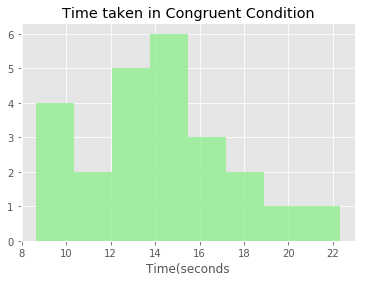

In [135]:
# Plotting the Histogram for Distribution of congruent condition
plt.hist(x,bins = 8,alpha = 0.8, color = 'lightgreen',Label = True)
plt.title('Time taken in Congruent Condition')
plt.xlabel('Time(seconds');

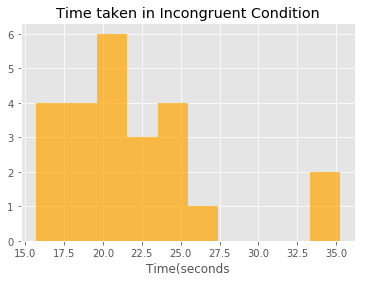

In [136]:
# Plotting the Histogram for Distribution of Incongruent condition
plt.hist(y,bins = 10,alpha = 0.7, color = 'orange')
plt.title('Time taken in Incongruent Condition')
plt.xlabel('Time(seconds');

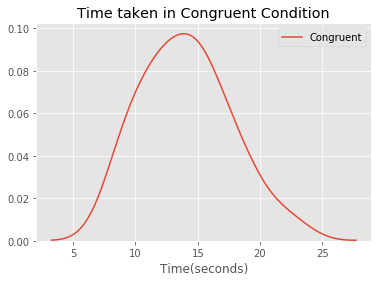

In [132]:
# KDE plot for Congruent Values
sns.kdeplot(x,legend = True)
plt.title('Time taken in Congruent Condition')
plt.xlabel('Time(seconds)');

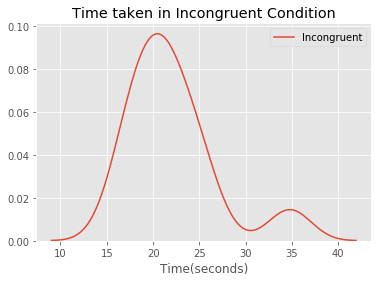

In [133]:
# KDE plot for Incongruent Condition
sns.kdeplot(y)
plt.title('Time taken in Incongruent Condition')
plt.xlabel('Time(seconds)');

--write answer here--
#### The above visualizations, Histograms, KDE plots ,  show that the distribution is normally distributed. 
Though few points make it a little right Skewed but overall its normal/gaussian distribution
#### KDE plot is helpful in giving a clear picture.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

# Statistical test 
The test of choice in this condition is 
### Paired Two tail T-Test  
Reason:  
    Paired :  Observations are of same individual which are taken before and after the effect, so they are paired.  
                  Two populations are normal.  
    Two Tail:  because Our Null Hypothesis stats that the mean of the two conditions are equal and Alternative Hypothesis stats that the mean is not equal  
    T-Test :   1. As the number of the sample is less than '30'  
               2. Variances are unknown  

In [121]:
# Perform the statistical test here

In [122]:
from scipy.stats import ttest_ind
ttest_ind(df['Congruent'],df['Incongruent'])

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

## Result
#### The T-statistic value is -6.5323  
#### The p value is 4.5949489622951854e-08 (quite small)
#### Using a 5% level for statistical significance i-e 95% of Confidence Interval,T-test was conducted.  
The results indicated that incongruent condition took more time than reading congruent words. and their is statistically significant differnce between the mean of the two conditions.

#### so we reject the null Hypothesis under these conditions and the test conducted.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--  
Selective Attention theory is responsible for such effect . this theory states that the concentration on colors take more time than on the words. so in the incongruent condition, brain has to ignore the words and say the color name only.  
This test woulb be easy for young kids who knows the color name but cant read. because then they have to say the color anme only in both cases.


Resources:  
https://faculty.washington.edu/chudler/words.html  
Book: An introduction to Statistics with python.  
NOtes: made from edx course "Essential Statistics with Excel"  